1)Use images from ALL FOUR classes.

2)Convert the images to edge histograms. (Assignment 1 - These will be the vector representations of the images). This will be your dataset for Part 3.

In [1]:
import os
import numpy as np
from PIL import Image
from skimage import io
from skimage.color import rgb2gray
from skimage import filters
from skimage import exposure, img_as_float
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import json
import warnings
warnings.filterwarnings("ignore")

main_dir = r'D:\Data Mining\Programming Assignment - 1\Codes\Cropped-1'
class_dir = [os.path.join(main_dir, class_name)
              for class_name in os.listdir(main_dir) 
              if os.path.isdir(os.path.join(main_dir, class_name))]
print("The four classes in my dataset are below\n")
def get_images():
    all_images = []
    for c in class_dir:
        files = [os.path.join(c, file)
                 for file in os.listdir(c)
                 if file.endswith(('.jpg'))]
        print(f"The {os.path.basename(c)} has {len(files)} images.")
        all_images.extend(files)
    return all_images

image_files = get_images()
print(f"\nThe total number of images are {len(image_files)}.")
i=0
edge_histograms = []
reduced_edge_histograms = []

def angle(dx, dy):
        return np.mod(np.arctan2(dy, dx), np.pi)

for file in image_files:
    # GrayScale
    original = io.imread(file)
    grayscale = rgb2gray(original)
    # Angle as the direction of edge gradient at the pixel
    angle_sobel = angle(filters.sobel_h(grayscale),  filters.sobel_v(grayscale))
    # Histogram
    hist_data=exposure.histogram(angle_sobel, nbins=36)
    edge_histograms.append(hist_data)
    hist_counts, bin_edges = hist_data
    # Normalized Histogram
    hist_counts_norm = hist_counts / hist_counts.sum()
    #print(f"\nHistogram Data {i+1}\n {hist_counts_norm}")
    i+=1
    reduced_edge_histograms.append(hist_counts_norm)

The four classes in my dataset are below

The n02092002-Scottish_deerhound has 232 images.
The n02093428-American_Staffordshire_terrier has 164 images.
The n02094114-Norfolk_terrier has 172 images.
The n02110958-pug has 200 images.

The total number of images are 768.


3)Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20.   

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html

# Assuming reduced_edge_histograms is our X array and contains the histogram data
X = np.array(reduced_edge_histograms)
#print(X)

# Generate y array with numeric labels for each class
y = []
class_labels = []
for idx, c in enumerate(class_dir):
    class_name = os.path.basename(c)
    class_labels.append(class_name)
    files = [file for file in os.listdir(c) if file.endswith('.jpg')]
    y.extend([idx] * len(files))
y = np.array(y)
#print(y)

# Perform the stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes to verify and check labels
print(f"X_train shape: {X_train.shape}")  # Training data features
print(f"X_test shape: {X_test.shape}")   # Testing data features
print(f"y_train shape: {y_train.shape}")  # Training data labels
print(f"y_test shape: {y_test.shape}\n")   # Testing data labels

# Count the no of training and testing samples per class
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

total_train = total_test = 0
for idx, class_name in enumerate(class_labels):
    train_count = train_counts[1][np.where(train_counts[0] == idx)[0][0]]
    test_count = test_counts[1][np.where(test_counts[0] == idx)[0][0]]
    print(f"Class '{class_name}': {train_count} training images, {test_count} test images")
    total_train += train_count
    total_test += test_count
print(f"\nTotal training images: {total_train}")
print(f"Total testing images: {total_test}")

X_train shape: (614, 36)
X_test shape: (154, 36)
y_train shape: (614,)
y_test shape: (154,)

Class 'n02092002-Scottish_deerhound': 185 training images, 47 test images
Class 'n02093428-American_Staffordshire_terrier': 131 training images, 33 test images
Class 'n02094114-Norfolk_terrier': 138 training images, 34 test images
Class 'n02110958-pug': 160 training images, 40 test images

Total training images: 614
Total testing images: 154


4)Perform standardization on the training dataset.
5)Perform standardization on the test dataset using the means and variances you obtained from the training dataset.

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_standardized = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data (without refitting)
X_test_standardized = scaler.transform(X_test)

# Check means and variances for confirmation
print(f"Shape of standardized training data: {X_train_standardized.shape}")
print("First few standardized Train histograms:\n", X_train_standardized[:5])
print(f"Mean of standardized training data: {X_train_standardized.mean(axis=0)}")
print(f"Variance of standardized training data: {X_train_standardized.var(axis=0)}")

print(f"Shape of standardized test data: {X_test_standardized.shape}")
print("First few standardized test histograms:\n", X_test_standardized[:5])
print(f"Mean of standardized test data: {X_test_standardized.mean(axis=0)}")
print(f"Variance of standardized test data: {X_test_standardized.var(axis=0)}")

Shape of standardized training data: (614, 36)
First few standardized Train histograms:
 [[-9.91366403e-02  7.38680194e-01  7.20723959e-01  2.94091116e-01
   7.56692813e-01  1.02604355e+00  3.50447178e-01 -2.51901869e-01
  -7.22041314e-01 -2.85365456e-01 -9.94772514e-02 -9.96260402e-01
  -7.61984960e-01 -6.64371911e-01 -1.07609054e+00 -9.71101034e-01
  -5.45752643e-01 -5.34040559e-01 -1.14024629e+00 -9.65624991e-01
  -4.51872896e-01 -6.22573747e-01 -2.85713043e-01 -7.21945896e-01
   2.50160437e-01  1.30360199e-01  1.04744213e+00  3.46425392e-01
   5.43534000e-01  2.58077620e-01  1.31712452e+00  1.19057228e+00
   7.48033079e-01  1.36185617e+00  9.37528031e-01  6.51602614e-01]
 [ 6.33628149e-01  1.83741855e+00  9.12958759e-01  1.07803113e+00
   1.29347662e+00  4.06792393e-01  1.04521786e+00 -5.82174766e-02
  -2.18747332e-01 -2.44177306e-01 -9.68282542e-01 -8.61870620e-01
  -1.81675034e+00 -1.62562997e+00 -1.47494292e+00 -1.51167767e+00
  -1.53981760e+00 -1.28544682e+00 -1.49371880e+00 -1

6)(Performance Comparison) Perform stratified 5-fold cross-validation on the 4-class classification problem using the three classification methods (available on canvas) assigned to you. Plot the (3) confusion matrices for using three approaches (clearly label the classes) on the test set (See Figure 1). (If you use code from any website, please do proper referencing. You will get 0 point for this assignment without proper referencing) 

Evaluating Naive Bayes...
Naive Bayes Non-normalized Classification Report:
                    precision    recall  f1-score   support

Scottish Deerhound       0.40      0.44      0.42       185
   AmStaff Terrier       0.17      0.11      0.13       131
   Norfolk Terrier       0.24      0.32      0.27       138
               Pug       0.34      0.31      0.32       160

          accuracy                           0.31       614
         macro avg       0.29      0.29      0.29       614
      weighted avg       0.30      0.31      0.30       614

Naive Bayes Normalized Classification Report:
                    precision    recall  f1-score   support

Scottish Deerhound       0.40      0.44      0.42       185
   AmStaff Terrier       0.17      0.11      0.13       131
   Norfolk Terrier       0.24      0.32      0.27       138
               Pug       0.34      0.31      0.32       160

          accuracy                           0.31       614
         macro avg       0.29    

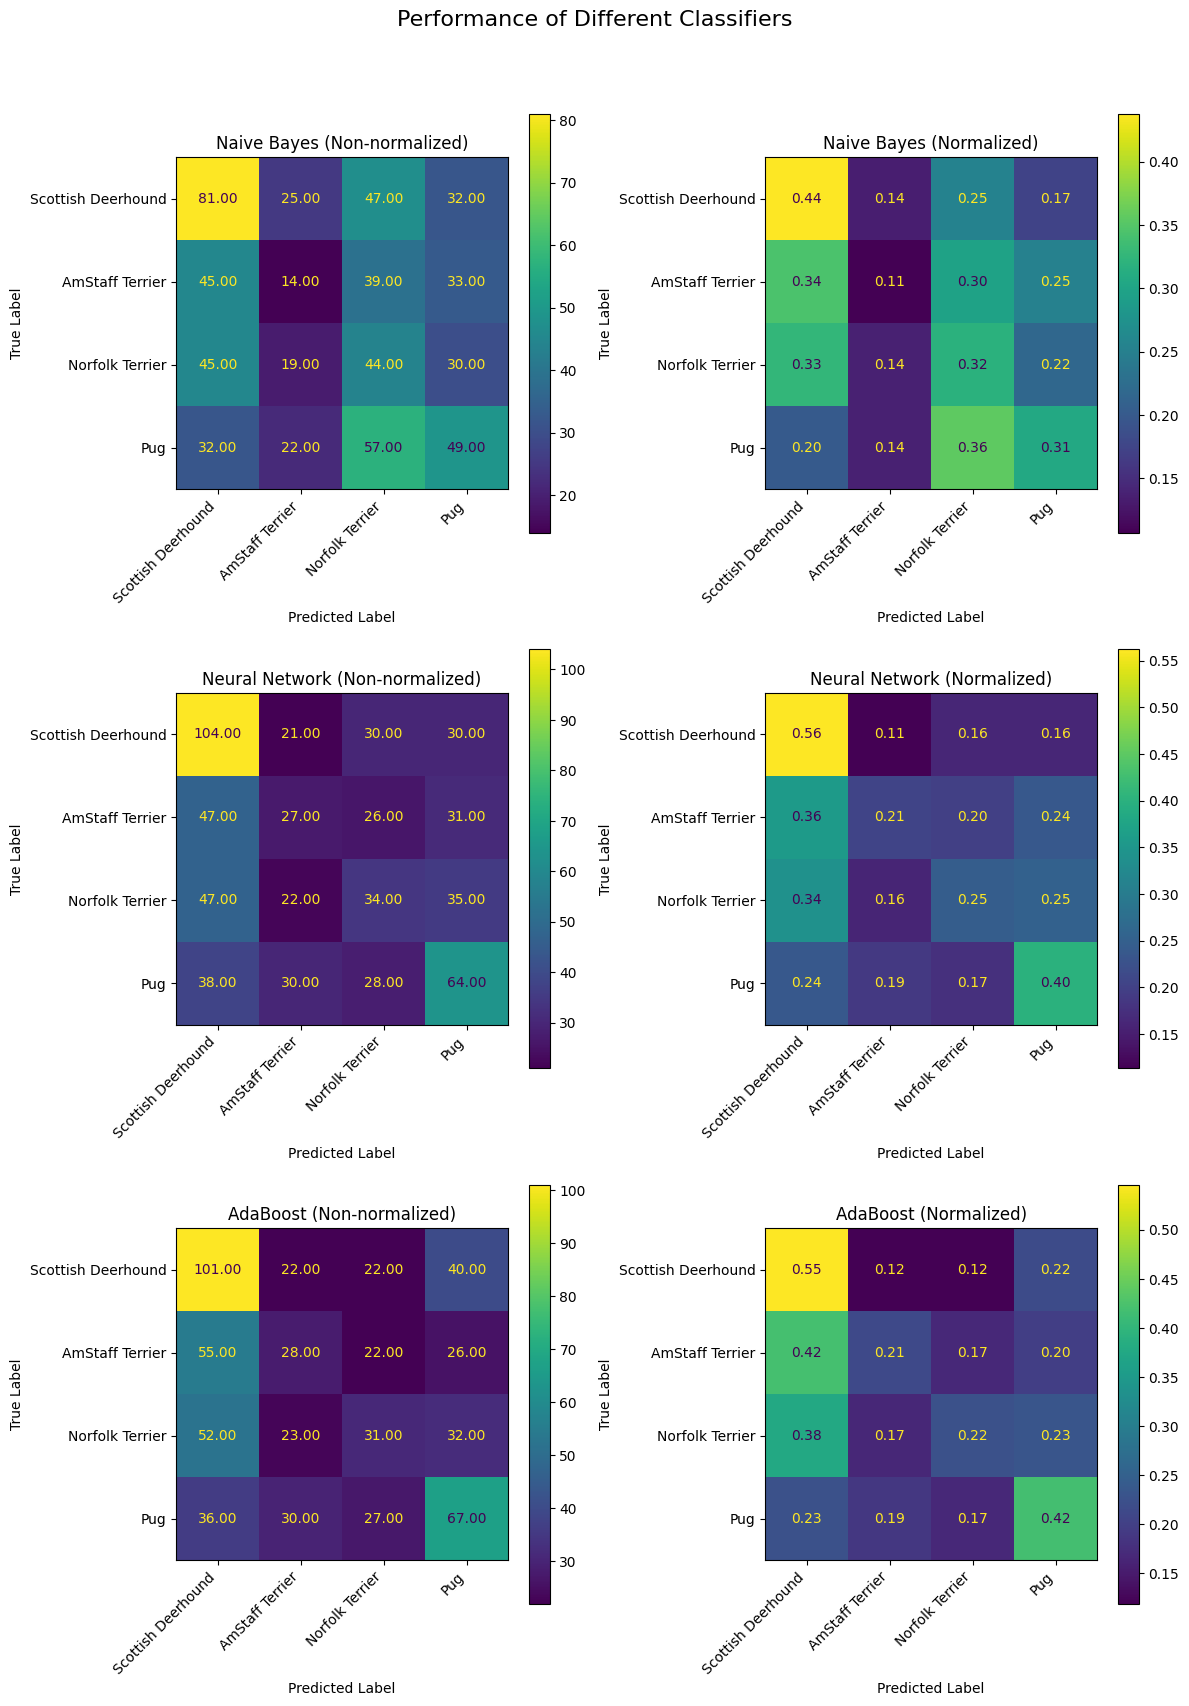

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your feature matrix and labels
X = X_train_standardized  # Use standardized features
y = y_train  # Use labels

# Original class names
class_labels = [
    "n02092002-Scottish_deerhound",
    "n02093428-American_Staffordshire_terrier",
    "n02094114-Norfolk_terrier",
    "n02110958-pug"
]

class_labels_abbrev = ["Scottish Deerhound", "AmStaff Terrier", "Norfolk Terrier", "Pug"]

# https://scikit-learn.org/stable/modules/naive_bayes.html
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/ensemble.html
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=300, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fig, axes = plt.subplots(len(classifiers), 2, figsize=(12, 18))
fig.suptitle('Performance of Different Classifiers', fontsize=16)

for idx, (name, clf) in enumerate(classifiers.items()):
    print(f"Evaluating {name}...")
    
    # Cross-validation predictions
    # https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.cross_val_predict.html
    y_pred = cross_val_predict(clf, X, y, cv=skf)

    # https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html
    # Non-normalized confusion matrix
    cm_non_normalized = confusion_matrix(y, y_pred)
    # Normalized confusion matrix
    cm_normalized = confusion_matrix(y, y_pred, normalize='true')

    # https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
    # Generate non-normalized and normalized classification reports
    report_non_normalized = classification_report(y, y_pred, target_names=class_labels_abbrev)
    report_normalized = classification_report(y, y_pred, target_names=class_labels_abbrev, output_dict=True)
    
    # Format normalized report
    report_normalized_formatted = classification_report(y, y_pred, target_names=class_labels_abbrev)
    
    # Print the reports side by side
    print(f"{name} Non-normalized Classification Report:\n{report_non_normalized}")
    print(f"{name} Normalized Classification Report:\n{report_normalized_formatted}\n")

    #https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
    # Plot non-normalized confusion matrix on the left column
    disp_non_norm = ConfusionMatrixDisplay(confusion_matrix=cm_non_normalized, display_labels=class_labels_abbrev)
    disp_non_norm.plot(ax=axes[idx, 0], cmap='viridis', values_format=".2f")
    disp_non_norm.ax_.set_title(f'{name} (Non-normalized)')
    disp_non_norm.ax_.set_xticklabels(class_labels_abbrev, rotation=45, ha='right')
    disp_non_norm.ax_.set_yticklabels(class_labels_abbrev)
    disp_non_norm.ax_.set_xlabel('Predicted Label')
    disp_non_norm.ax_.set_ylabel('True Label')
    
    # Plot normalized confusion matrix on the right column
    disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_labels_abbrev)
    disp_norm.plot(ax=axes[idx, 1], cmap='viridis', values_format=".2f")
    disp_norm.ax_.set_title(f'{name} (Normalized)')
    disp_norm.ax_.set_xticklabels(class_labels_abbrev, rotation=45, ha='right')
    disp_norm.ax_.set_yticklabels(class_labels_abbrev)
    disp_norm.ax_.set_xlabel('Predicted Label')
    disp_norm.ax_.set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for titl
plt.show()

By visually comparing (e.g., looking at the color on the diagonal values, etc.) the three confusion matrices (on the test set), which do you think is the best method? Why?

When comparing the columns of all three confusion matrices for Naive Bayes, Neural Network (MLP), and AdaBoost classifiers, I noticed the following

Naive Bayes logistics regression produces less precise classification, as seen from the smaller diagonal values indicating a more spread out classification error between classes. This implies that accuracy levels in Naive Bayes is not very good in separating the classes in this dataset.

As can be seen from the diagonal values the Neural Network (MLP) gives much better classification results than Naive Bayes. The misclassifications are no longer severe and can still be observed.

AdaBoost has the highest resemblance coefficient in the diagram and the high values are well concentrated at the diagonal. AdaBoost proves to exhibit fairly good results for all classes with lower misclassifications than Neural Network in some areas.

To me, AdaBoost looks like it is the best classifier for this particular dataset since it ordinarily yields the highest accuracy with most of the correct classifications being concentrated, and least misclassifications compared to both Neural Network and Naive Bayes. However, if computational resources or real-time prediction speed is a concern, the slightly simpler Neural Network could be a viable alternative with competitive performance.

Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods.Which is the best method?

In [5]:
from sklearn.model_selection import cross_val_score

mean_accuracies = {}

for name, clf in classifiers.items():
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    # Perform cross-validation and calculate accuracy for each fold
    scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    
    mean_accuracy = np.mean(scores)
    mean_accuracies[name] = mean_accuracy
    
    print(f"{name} Mean Validation Accuracy: {mean_accuracy:.4f}")

# The best method based on mean validation accuracy
best_method = max(mean_accuracies, key=mean_accuracies.get)
print(f"\nThe best method based on mean validation accuracy is: {best_method} with an accuracy of {mean_accuracies[best_method]:.4f}")

Naive Bayes Mean Validation Accuracy: 0.3062
Neural Network Mean Validation Accuracy: 0.3729
AdaBoost Mean Validation Accuracy: 0.3697

The best method based on mean validation accuracy is: Neural Network with an accuracy of 0.3729


Compute the accuracies for the three methods on the test set. Which is the best method?

In [6]:
from sklearn.metrics import accuracy_score

X_train, X_test = X_train_standardized, X_test_standardized
y_train, y_test = y_train, y_test

test_accuracies = {}

# Iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies[name] = test_accuracy
    
    # Print accuracy for each classifier
    print(f"{name} Test Set Accuracy: {test_accuracy:.4f}")

# The best method based on test set accuracy
best_method = max(test_accuracies, key=test_accuracies.get)
print(f"\nThe best method based on test set accuracy is: {best_method} with an accuracy of {test_accuracies[best_method]:.4f}")

Naive Bayes Test Set Accuracy: 0.3247
Neural Network Test Set Accuracy: 0.3506
AdaBoost Test Set Accuracy: 0.2727

The best method based on test set accuracy is: Neural Network with an accuracy of 0.3506


Compute the F-measure for the three methods on the test set. Which is the best method?

In [7]:
from sklearn.metrics import f1_score

X_train, X_test = X_train_standardized, X_test_standardized
y_train, y_test = y_train, y_test

f1_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    y_test_pred = clf.predict(X_test)
    
    # Calculate F1-score on the test set
    f1 = f1_score(y_test, y_test_pred, average='macro')
    f1_scores[name] = f1
    
    # Print F1-score for each classifier
    print(f"{name} Test Set F1-Score (Macro Average): {f1:.4f}")

# The best method based on F1-score
best_method = max(f1_scores, key=f1_scores.get)
print(f"\nThe best method based on test set F1-score is: {best_method} with an F1-score of {f1_scores[best_method]:.4f}")

Naive Bayes Test Set F1-Score (Macro Average): 0.3165
Neural Network Test Set F1-Score (Macro Average): 0.3041
AdaBoost Test Set F1-Score (Macro Average): 0.2597

The best method based on test set F1-score is: Naive Bayes with an F1-score of 0.3165


7)(Model Selection) Use images from TWO classes. Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation on the training set (i.e., the standardized edge histogram dataset obtained from the training set) for Support Vector Classifiers using LinearSVC such that parameter
𝐶 = 0.1, 1, 10, 100 and other parameters set as default

In [8]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# For Training Data
X = X_train_standardized
y = y_train

class_names = {
    0: "n0209200-2Scottish_deerhound",
    1: "n02093428-American_Staffordshire_terrier",
    2: "n02094114-Norfolk_terrier",
    3: "n02110958-Pug"
}

selected_classes = [0, 1]

print("Selected Classes for Evaluation:")
for class_index in selected_classes:
    print(f"- {class_names[class_index]}")
    
class_mask = np.isin(y, selected_classes)

X = X[class_mask]
y = y[class_mask]

print("Filtered X shape:", X.shape)
print("Filtered y shape:", y.shape)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# For Test Data
X_test = X_test_standardized
y_test = y_test

print("\nSelected Classes for Evaluation (Test):")
for class_index in selected_classes:
    print(f"- {class_names[class_index]}")

class_mask_test = np.isin(y_test, selected_classes)
X_test_filtered = X_test[class_mask_test]
y_test_filtered = y_test[class_mask_test]

# Using the same label encoder instance to ensure consistent encoding with the training set
y_test_encoded = label_encoder.transform(y_test_filtered)

print("Filtered Test X shape:", X_test_filtered.shape)
print("Filtered Test y shape:", y_test_encoded.shape)

'''
unique_classes = np.unique(y_train)  # Find all unique classes in the dataset
selected_classes = np.random.choice(unique_classes, 2, replace=False)  # Randomly select two classes

print("Selected Classes for Evaluation:")
for class_index in selected_classes:
    print(f"- {class_names[class_index]}")
    
# Create a mask that is True for indices where the class label is one of the selected classes
class_mask = np.isin(y_train, selected_classes)

# Filter X_train_standardized and y_train to only include the selected classes
X = X_train_standardized[class_mask]
y = y_train[class_mask]

# Update the classes to be 0 and 1 for simplicity using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
'''
unique_classes = np.unique(y)
print("Classes selected for the test:", unique_classes)

# Parameters to test
C_values = [0.1, 1, 10, 100]
cv_types = {'Standard 5-Fold': KFold(n_splits=5), 'Stratified 5-Fold': StratifiedKFold(n_splits=5)}

# Dictionary to store the results
results = {}

# https://scikit-learn.org/dev/modules/generated/sklearn.svm.LinearSVC.html
# Perform cross-validation
for name, cv in cv_types.items():
    results[name] = {}
    for C in C_values:
        model = LinearSVC(C=C, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        results[name][f'C={C}'] = np.mean(scores)
        print(f"{name} with C={C}: Mean Accuracy = {np.mean(scores):.4f}")

# Print all results for comparison
for cv_type, accuracies in results.items():
    print(f"\n{cv_type} results:")
    for C, accuracy in accuracies.items():
        print(f"{C}: {accuracy:.4f}")

Selected Classes for Evaluation:
- n0209200-2Scottish_deerhound
- n02093428-American_Staffordshire_terrier
Filtered X shape: (316, 36)
Filtered y shape: (316,)

Selected Classes for Evaluation (Test):
- n0209200-2Scottish_deerhound
- n02093428-American_Staffordshire_terrier
Filtered Test X shape: (80, 36)
Filtered Test y shape: (80,)
Classes selected for the test: [0 1]
Standard 5-Fold with C=0.1: Mean Accuracy = 0.6236
Standard 5-Fold with C=1: Mean Accuracy = 0.6203
Standard 5-Fold with C=10: Mean Accuracy = 0.6203
Standard 5-Fold with C=100: Mean Accuracy = 0.6203
Stratified 5-Fold with C=0.1: Mean Accuracy = 0.6203
Stratified 5-Fold with C=1: Mean Accuracy = 0.6046
Stratified 5-Fold with C=10: Mean Accuracy = 0.6046
Stratified 5-Fold with C=100: Mean Accuracy = 0.6046

Standard 5-Fold results:
C=0.1: 0.6236
C=1: 0.6203
C=10: 0.6203
C=100: 0.6203

Stratified 5-Fold results:
C=0.1: 0.6203
C=1: 0.6046
C=10: 0.6046
C=100: 0.6046


Plot a graph (x-axis: 𝐶; y-axis: mean validation/training error (%)) containing four error curves (2 validation error curves and 2 training error curves - label them clearly using a legend to define the curves). Which 𝐶 has/have the lowest mean error for each curve? Comment about (1) the model complexity for SVM in relation to 𝐶, and (2) when/whether there is overfitting/underfitting.

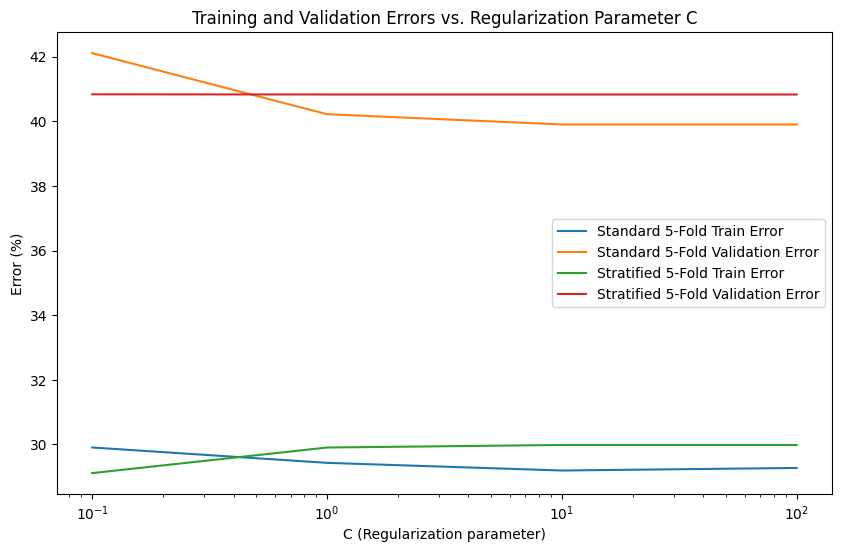

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold

# Assuming X, y, and other preprocessing are already defined

# Parameters to test
C_values = [0.1, 1, 10, 100]
cv_types = {
    'Standard 5-Fold': KFold(n_splits=5, shuffle=True, random_state=42),
    'Stratified 5-Fold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
}

# Dictionary to store the results
results = {
    'Standard 5-Fold Train Error': [],
    'Standard 5-Fold Validation Error': [],
    'Stratified 5-Fold Train Error': [],
    'Stratified 5-Fold Validation Error': []
}
# https://scikit-learn.org/stable/modules/cross_validation.html
# Perform cross-validation
for name, cv in cv_types.items():
    train_errors = []
    test_errors = []
    for C in C_values:
        model = LinearSVC(C=C, random_state=42, max_iter=10000)
        cv_results = cross_validate(model, X, y, cv=cv, return_train_score=True, scoring='accuracy')
        train_error = 1 - np.mean(cv_results['train_score'])
        test_error = 1 - np.mean(cv_results['test_score'])
        train_errors.append(train_error * 100)
        test_errors.append(test_error * 100)
    results[name + ' Train Error'] = train_errors
    results[name + ' Validation Error'] = test_errors

# Plotting the graph
plt.figure(figsize=(10, 6))
for key, values in results.items():
    plt.plot(C_values, values, label=key)
plt.title('Training and Validation Errors vs. Regularization Parameter C')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Error (%)')
plt.legend()
plt.xscale('log')
plt.show()


Which 𝐶 has/have the lowest mean error for each curve? 
Standard 5-Fold Training Error: Lowest mean error at C=10.
Standard 5-Fold Validation Error: Gradual decrease with increasing C; lowest at C=100.
Stratified 5-Fold Training Error: Also lowest at C=10.
Stratified 5-Fold Validation Error: Decrease with increasing C; lowest at C=100.
Comment about 
(1) the model complexity for SVM in relation to 𝐶, and?
SVM Model Complexity: Thus in the context of LinearSVC C the parameter determines the penalty that is to be paid for an error term. If the C value is set to a higher value it results into low value for the error term for this reason, the model tends to fit highly on the training set resulting in more noise and the details (high model complexity).
Effect of C: When the C values decreases to a lower value such as 0.1 the model becomes more regularized and thus the model preferred a big margin over the perfect classification of all the training samples. In an attempt to enhance its evaluation all required features, the model has to increase the decision margin as C increases during training.
(2) when/whether there is overfitting/underfitting?
Overfitting: Usually accompanied by low training error and high validation error. On your graph, the overfitting signs are more visible when C increases (100) based on the validation and training errors where the former’s curves are not as steep as the latter.
Underfitting: Visible when both training and validation errors are high. Perhaps this is even bigger at low C values, say 0.1., which indicates that the model could be overly simple and may have low variance meaning it could underfit.

Use the 𝐶 value with the lowest mean validation error for your SVM classifier from the stratified 5-fold cross-validation. What is the error for the test dataset (i.e., the standardized edge histogram dataset obtained from the test set)?

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Find the C with the lowest validation error from Stratified 5-Fold
C_values = [0.1, 1, 10, 100]
validation_errors = results['Stratified 5-Fold Validation Error']
best_C_index = np.argmin(validation_errors)
best_C = C_values[best_C_index]

print(f"The best C value from Stratified 5-Fold CV is {best_C}")

# Retrain the model using the best C
model = LinearSVC(C=best_C, random_state=42)
model.fit(X, y)

y_pred = model.predict(X_test_filtered)
test_accuracy = accuracy_score(y_test_encoded, y_pred)
test_error = 1 - test_accuracy

print(f"Test Error with C={best_C}: {test_error * 100:.2f}%")

The best C value from Stratified 5-Fold CV is 1
Test Error with C=1: 37.50%
